# <center> TruthShield: Building an Advanced Fake News Classifier

# Introduction:

In today's digital landscape, distinguishing between genuine news and fake information has become a pressing challenge. To address this issue, we present "TruthShield," a Fake News Classifier project. The dataset comprises real news articles from reliable sources like Reuters.com and fake news articles from flagged, unreliable websites checked by fact-checking organizations like Politifact and Wikipedia. With advanced machine learning and natural language processing techniques, we aim to empower users to identify and filter out deceptive news, promoting a more informed and resilient society. Let's embark on this journey to defend the integrity of information and combat misinformation together.

# Data Collection:
***Data source:***
The data has been collected from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset and you can download it [here.](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)

This dataset contains two types of articles fake and real news. This dataset has been collected from real world sources; the truthful articles were obtained by crawling articles from Reuters.com (A legitimate News website). As for the fake news articles, they were collected from a number of various sources. These fake news artiicles were collected from unrreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contatins different types of articles on different topics, however, the majority of articles focus on political and world news topics. 

The dataset consists of two CSV files. The file ***True.csv*** contains more than 12,600 articles from reuter.com while the second file ***Fake.csv*** contains more than 12,600 articles from different fake news outlet resources. Each article (data point) contains the following information: 
- Article Title
- Article Text
- Article Subject
- Date the article was published on

The overall data has been cleaned for us prior to downloading on it and contains articles from 2016 to 2017 and contains punctuations and mistakes that existed in the ***Fake.csv*** were kept as is.


# Importing Libraries:

In [1]:
!pip install wordcloud

In [2]:
# This is the first cell with all imports for throughout 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For saving the models later. 
import joblib

# Importing wordcloud and its necessary stopwords package
from wordcloud import WordCloud, STOPWORDS 

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# For seeing and removing stopwords
from nltk.corpus import stopwords 

# For lemmatizing our words 
from nltk.stem import WordNetLemmatizer

# For stemming our words 
from nltk.stem import PorterStemmer

# Cleaning tools imports 
# Importing string for cleaning punctuations
import string 

# Importing Regex
import re

# Vectorizing Imports
# Importing CountVectorizer to tokenize our articles
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# For making training and testing splits prior to modelling
from sklearn.model_selection import train_test_split

# Importing Scaler for Scaling Data
from sklearn.preprocessing import StandardScaler

# Importing the different models for modelling purposes
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

# Importing metrics to evaluate our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# For building up a pipeline
from sklearn.pipeline import Pipeline

# For a cross-validated grid search
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
fake_df= pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [5]:
# function to get shape of each dataset
def cal_size(dataset):
  print(dataset.shape)

cal_size(fake_df)
cal_size(true_df)

(23481, 4)
(21417, 4)


**As mentioned earlier, below we will take a 30% sample of our original data due to the length of the articles**

In [7]:
# Let's make copies of our DataFrames as we don't want to make changes to the original one
true_df = true_df.sample(frac = .30).copy() # copying our true article dataframe
fake_df = fake_df.sample(frac = .30).copy() # copying our fake articles dataframe

In [8]:
# Getting the total number of words in our title column for the true articles 
true_df['Title Word Count'] = true_df['title'].apply(lambda x: len(x.split(' ')))

# Getting the total number of words in our text column for the true articles 
true_df['Text Word Count'] = true_df['text'].apply(lambda x: len(x.split(' ')))

# Getting the total number of words in our title column for the fake articles 
fake_df['Title Word Count'] = fake_df['title'].apply(lambda x: len(x.split(' ')))

# Getting the total number of words in our text column for the fake articles 
fake_df['Text Word Count'] = fake_df['text'].apply(lambda x: len(x.split(' ')))

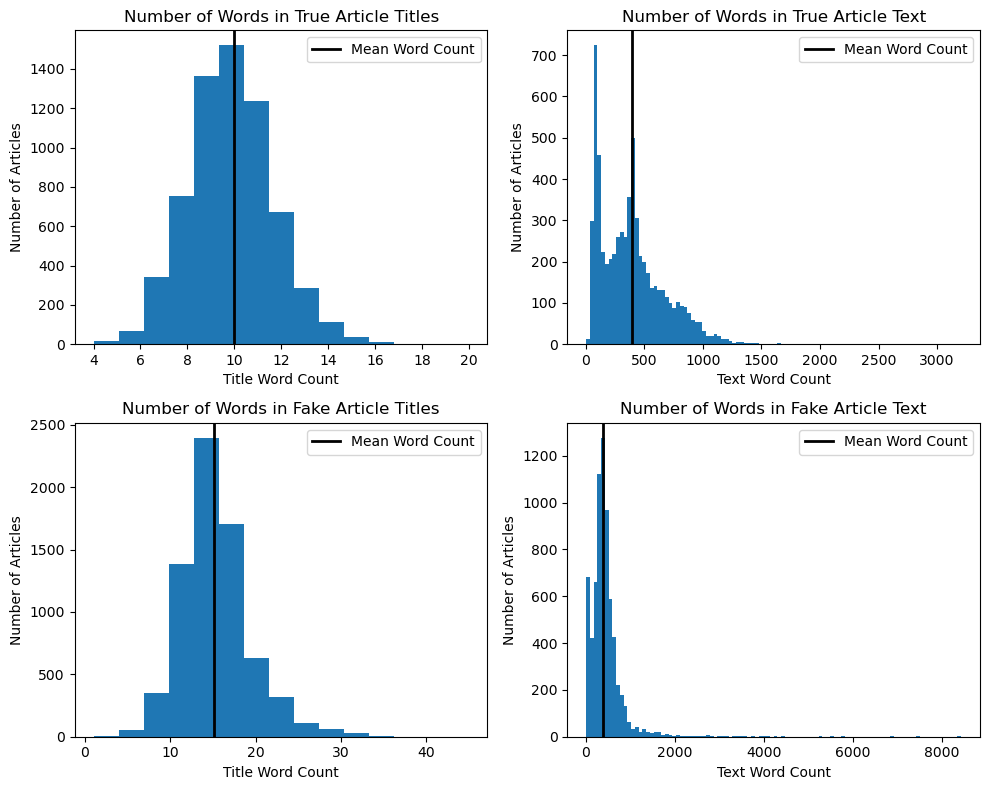

In [9]:
# Setting up our subplots
plt.subplots(2,2, figsize = (10,8))

# Subplot 1: Title word counts for true dataframe
plt.subplot(2,2,1)
plt.hist(true_df['Title Word Count'], bins =15)
plt.title('Number of Words in True Article Titles')
plt.xlabel('Title Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=true_df['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Subplot 2: Text word counts for true dataframe
plt.subplot(2,2,2)
plt.hist(true_df['Text Word Count'], bins =100)
plt.title('Number of Words in True Article Text')
plt.xlabel('Text Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=true_df['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Subplot 3: Title word counts for fake dataframe
plt.subplot(2,2,3)
plt.hist(fake_df['Title Word Count'], bins =15)
plt.title('Number of Words in Fake Article Titles')
plt.xlabel('Title Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=fake_df['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Subplot 4: Text word counts for fake dataframe
plt.subplot(2,2,4)
plt.hist(fake_df['Text Word Count'], bins = 100)
plt.title('Number of Words in Fake Article Text')
plt.xlabel('Text Word Count')
plt.ylabel('Number of Articles')
plt.axvline(x=true_df['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '-',
            color = 'black', label = 'Mean Word Count')
plt.legend()
plt.tight_layout()
plt.show()

Some observations that can be made here are:

- An article that is factual tends to have about 10 words, on average, in their titles while fake articles or articles that have misinformation tend to have about 15 words on average. 
- In terms of the article text length, both articles tend to have an average length of 396 words for the factual content and 436 words for the article with misinformation respectively. 
- One thing to note here is that the maximum length of our factual articles is 3000 words while the articles which can be classified as fake or having misinformation have articles a length of up to approximately 8500 words. We must keep in mind that this is only 30% of the entire data. 
- We also see that the number of articles for the true and fake articles vary on the y axis and seems like there's a lot more titles than text. There seems to be almost twice the number of titles than text. 


A decision has to be made here and it is to drop all articles over the length of 3000 words. This is because we don't want our model to predict whether an article is factual or not based on the length of the article **rather** than the way it's written. 

In [10]:
# Printing out some information for the reader to scroll through & understand what proportion of the data is being dropped
# Counting the number of data points 
print('The number of articles that have a word count of more than 3000 words in our text column:')
print(len(true_df[true_df['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('The propotion of the true articles that will be dropped:')
print(len(true_df[true_df['Text Word Count'] > 3000]) / len(true_df))
print()

# Checking for all rows where Text Word Count is over 3000 
print("The rows that'll be dropped are as follows:")
print()
display(true_df[true_df['Text Word Count'] > 3000])

The number of articles that have a word count of more than 3000 words in our text column:
2

The propotion of the true articles that will be dropped:
0.000311284046692607

The rows that'll be dropped are as follows:



,title,text,subject,date,Title Word Count,Text Word Count
3319,Text: Ex-FBI Director Comey's prepared testimo...,(Reuters) - Following is the full text of form...,politicsNews,"June 7, 2017",9,3206
8563,"The Big Squeeze: This election year, it’s all ...","MIDDLETOWN, CONN. - Two years ago, Judy Konopk...",politicsNews,"August 2, 2016",11,3137


In [11]:
# Printing out some information for the reader to scroll through & understand what proportion of the data is being dropped
# Counting the number of data points
print('The number of articles that have a word count of more than 3000 words in our text column:')
print(len(fake_df[fake_df['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('The propotion of the fake articles that will be dropped:')
print(len(fake_df[fake_df['Text Word Count'] > 3000]) / len(fake_df))
print()

# Checking for all rows where Text Word Count is over 3000 
print("The rows that'll be dropped are as follows:")
print()
display(fake_df[fake_df['Text Word Count'] > 3000])


The number of articles that have a word count of more than 3000 words in our text column:
39

The propotion of the fake articles that will be dropped:
0.005536626916524702

The rows that'll be dropped are as follows:



,title,text,subject,date,Title Word Count,Text Word Count
23150,"ANARCHY BY DESIGN: ‘Anti-Trump’ Flash Mobs, Ho...",Shawn Helton 21st Century WireIt s a novel sc...,Middle-east,"November 17, 2016",13,3948
22228,FAKE NEWS WEEK: Exposing The Mainstream Consen...,In response to the establishment media s cont...,US_News,"February 7, 2017",9,4075
23178,Trump vs Clinton 2016: Mickey Mouse vs Cruella...,Patrick Henningsen 21st Century WireToday Ame...,Middle-east,"November 8, 2016",10,5762
22173,BIGGER THAN SNOWDEN: Wikileaks ‘Vault 7’ Class...,He who controls the spice controls the univer...,US_News,"March 13, 2017",15,3938
23086,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,Middle-east,"December 28, 2016",13,8436
23271,"BUSH-HINCKLEY NEXUS: Reagan Gunman Released, R...",Shawn Helton 21st Century WireOn the eve of th...,Middle-east,"September 9, 2016",8,3413
22539,"CASTING CRISIS: Orlando’s Actors, Agents and C...",Shawn Helton 21st Century WireTruth is often s...,US_News,"June 18, 2016",9,3378
22778,MSM Fake News: How Washington Post Sexed-up it...,This is a story about how once trusted mainstr...,Middle-east,"September 26, 2017",12,3056
23011,FAKE NEWS WEEK: Exposing The Mainstream Consen...,In response to the establishment media s cont...,Middle-east,"February 7, 2017",9,4075
23238,AGITPROP MACHINE: How the US create Fake Al Qa...,Shawn Helton 21st Century WireFollowing the in...,Middle-east,"October 4, 2016",12,3784


From the above, we can see the data points we want to drop. A data point can also be considered an article. We will therefore be dropping all data points over 3000 words. The proportions of these articles being dropped is less that 0.05% and that's the threshold we would be okay with when considering to drop the data. Now that our outlier articles are being removed, let's drop these rows above and reset our indexes. While we're doing this, we also plan to drop any article that has a length of less than 20 words as most articles don't tend to be under that word limit. 

In [12]:
# Now that the articles have been dropped, it's time to reset the index once again. 
# Dropping rows from true articles dataframe where text length is under 20 and over 4000 words and resetting index 
true_df.drop(true_df[true_df['Text Word Count'] < 20].index, inplace = True)
true_df.drop(true_df[true_df['Text Word Count'] > 3000].index, inplace = True)
true_df.reset_index(drop = True, inplace = True)

# Dropping rows from fake articles dataframe where text length is under 20 and over 4000 words and resetting index 
fake_df.drop(fake_df[fake_df['Text Word Count'] < 20].index, inplace = True)
fake_df.drop(fake_df[fake_df['Text Word Count'] > 3000].index, inplace = True)
fake_df.reset_index(drop = True, inplace = True)

##### Time to see whether our columns have duplicated or null values

In [13]:
# Checking for the sum of duplicated datapoints in our True DataFrame
true_df.duplicated().sum()

15

In [14]:
# Checking for the sum of duplicated datapoints in our Fake DataFrame
fake_df.duplicated().sum()

0

In [15]:
# Checking for nulls in our True DataFrame
true_df.isna().sum()

title               0
text                0
subject             0
date                0
Title Word Count    0
Text Word Count     0
dtype: int64

In [16]:
# Checking for nulls in our Fake DataFrame
fake_df.isna().sum()

title               0
text                0
subject             0
date                0
Title Word Count    0
Text Word Count     0
dtype: int64

In [17]:
# Removing duplicates from True DataFrame.
true_df.drop_duplicates(inplace = True)


# Removing duplicates from Fake DataFrame
fake_df.drop_duplicates(inplace = True)

#### Removing punctuations, numbers and lower casing from our text columns:

In [18]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [19]:
true_df["text"] = true_df["text"].apply(word_drop)
fake_df["text"] = fake_df["text"].apply(word_drop)

**Before we combine the two DataFrames together, how about we look at the top and bottom 20 words. Let's do this below:**

**Disclaimer:** We'll perform these vectorizations together and print it separately so things might get messy. However, on the plus side, we'll identify the words that are repetitive in the articles. 

In [20]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

# Setting up our variables
X_true = true_df['text']
X_fake = fake_df['text']

# Instantiating the true and fake vectorizers
true_vectorizer = CountVectorizer(stop_words='english', max_features=1000, binary=True, dtype=np.float32)
fake_vectorizer = CountVectorizer(stop_words='english', max_features=1000, binary=True, dtype=np.float32)

# Fitting the Vectorizer for the two
true_vectorizer.fit(X_true)
fake_vectorizer.fit(X_fake)

# Transforming X_true and X_fake
X_true = true_vectorizer.transform(X_true)
X_fake = fake_vectorizer.transform(X_fake)

print('Time taken to vectorize:')

Time taken to vectorize:
CPU times: total: 12.3 s
Wall time: 18.8 s


In [21]:
# We extract the information and put it in a data frame
true_vectorizer_df = pd.DataFrame(columns=true_vectorizer.get_feature_names_out(),\
                                     data=X_true.toarray())

fake_vectorizer_df = pd.DataFrame(columns=fake_vectorizer.get_feature_names_out(),\
                                     data=X_fake.toarray())

In [22]:
# Creating the dataframe and summing across axis 0 to get the count of words
true_word_count_df = pd.DataFrame(true_vectorizer_df.sum(axis = 0).reset_index())
fake_word_count_df = pd.DataFrame(fake_vectorizer_df.sum(axis = 0).reset_index())

# Renaming the columns
true_word_count_df.columns = ['Word', 'Word Count']
fake_word_count_df.columns = ['Word', 'Word Count']

# Resetting the index for this new dataframe
true_word_count_df.reset_index(inplace = True, drop = True)
fake_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
top_20_true_words = true_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)
top_20_fake_words = fake_word_count_df.sort_values(by = 'Word Count', ascending = False).head(20)

# Getting the bottom 20 words for both
bottom_20_true_words = true_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)
bottom_20_fake_words = fake_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)

In [23]:
from IPython.display import display_html
# Defining the function
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [24]:
# Displaying the two dataframes created above with a side by side function created above too
display_side_by_side(top_20_true_words, top_20_fake_words)

,Word,Word Count
775,reuters,6401.0
794,said,6019.0
676,president,3915.0
935,trump,2847.0
923,told,2782.0
276,donald,2754.0
971,washington,2656.0
996,year,2568.0
866,state,2536.0
375,government,2498.0


In [25]:
# # Here we're going to import nltk stopwords and assigning it to a listofstopwords so we can extend the list and
# # add more words to it, words that we see above which may overlap as well as the ones pulled out from the wordcloud. 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords
listofstopwords = list(stopwords)
listofstopwords.extend(('said','trump','reuters','president','state','government','states','new','house','united',
                       'clinton','obama','donald','like','news','just', 'campaign', 'washington', 'election',
                        'party', 'republican', 'image', 'just','say','obama','(reuters)','govern','news','united', 'states', '-', 'said', 'arent', 'couldnt',
                        'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent','isnt', 'mightnt', 'mustnt', 'neednt',
                        'shant', 'shes', 'shouldnt', 'shouldve','thatll', 'wasnt', 'werent', 'wont', 'wouldnt',
                        'youd','youll', 'youre', 'youve', 'trump', 'democrat', 'white', 'black', 'reuter', 'monday',
                        'tuesday','wednesday','thursday', 'friday','saturday','sunday'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#####  Labelling the Datasets 

In [26]:
# Adding a column of ones in the True Data Frames to identify True as class 1
true_df['label'] = 1 

# Adding a column of ones in the True Data Frames to identify Fake as class 0
fake_df['label'] = 0 

#### Let's Concat these two:

In [27]:
df = pd.concat([true_df, fake_df], axis=0)

In [28]:
df.reset_index(drop = True, inplace = True)
# Setting up our X-features and y-target variables again
X = df['text']
y = df['label']

In [29]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13114 entries, 0 to 13113
Series name: label
Non-Null Count  Dtype
--------------  -----
13114 non-null  int64
dtypes: int64(1)
memory usage: 102.6 KB


# Vectorization

##### Building a personalized Tokenizer to get make the following changes to our text:
- Splitting words
- Remove stopwords

In [30]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def my_lemmatization_tokenizer(text):
    # Tokenize the text using word_tokenize
    listofwords = word_tokenize(text)

    listoflemmatized_words = []
    
    for word in listofwords:
        # Check if the word is not in the list of stopwords and not an empty string
        if (not word in listofstopwords) and (word != ''):
            lemmatized_word = lemmatizer.lemmatize(word)
            listoflemmatized_words.append(lemmatized_word)
            
    return listoflemmatized_words

In [31]:
%%time
import nltk
nltk.download('punkt')
# Splitting our data prior to modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)


# Vectorizing using a TFIDFVectorizer
tfidf_final = TfidfVectorizer(min_df = 500,
                              ngram_range = (1,2),\
                             tokenizer = my_lemmatization_tokenizer)

# Fitting our vectorizing on the training data
tfidf_final.fit(X_train)

# Tranforming our training data
X_train = tfidf_final.transform(X_train)

# Tranforming our testing data
X_test = tfidf_final.transform(X_test)

print('Time taken:')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Time taken:
CPU times: total: 2min 37s
Wall time: 3min 38s


In [32]:
# We extract the information and put it in a data frame
tfidf_final_df = pd.DataFrame(columns=tfidf_final.get_feature_names_out(),\
                                     data=X_train.toarray())
display(tfidf_final_df)

,able,according,account,accused,across,act,action,actually,added,adding,...,worker,working,world,would,wrote,year,year old,yet,york,young
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.220826,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.188546,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.078145,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.154226,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.000000,0.060154,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.026163,0.0,0.028153,0.000000,0.049981,0.000000,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.078625,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,0.0,0.096735,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
9175,0.0,0.046915,0.000000,0.000000,0.0,0.058855,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.061728,0.0,0.033212,0.000000,0.058962,0.056797,0.0
9176,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.102491,0.0,0.000000,0.000000,0.097899,0.188608,0.0
9177,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.046058,0.0,0.198250,0.000000,0.000000,0.339031,0.0


In [33]:
# Creating the dataframe and summing across axis 0 to get the count of words
final_tfidf_word_count_df = pd.DataFrame(tfidf_final_df.sum(axis = 0).reset_index())

# Renaming the columns
final_tfidf_word_count_df.columns = ['Word', 'Word Weightage']

# Resetting the index for this new dataframe
final_tfidf_word_count_df.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
final_tfidf_word_count_df.sort_values(by = 'Word Weightage', ascending = False).head(20)

,Word,Word Weightage
513,u,527.369049
549,would,405.023026
361,people,359.776867
551,year,341.624642
349,one,308.092174
103,country,257.868109
496,time,257.252398
25,also,255.406619
29,american,245.587285
417,right,243.025775


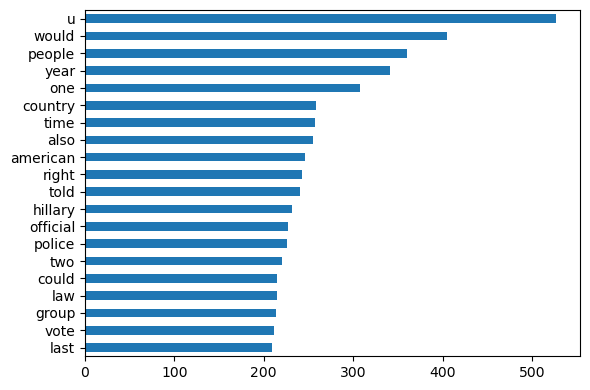

In [34]:
# Plotting the top 20 words from the final vectorizing 
plt.figure(figsize=(6, 4))
pd.DataFrame(X_train.todense(), columns=tfidf_final.get_feature_names_out()).\
    sum().sort_values(ascending=False).iloc[0:20].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

Before moving on, it would also be smart to pickle our lemmatization tokenizer, as well as the vectorizer itself so that if we decide to use an application to create an interface for human interaction, we don't have to repeat this step.

In [35]:
# Here we're going to do some pickling
# First we pickle our lemmatization tokenizer
joblib.dump(my_lemmatization_tokenizer, 'lemmatization_tokenizer.pkl')

# We're also going to pickle the vectorizer
joblib.dump(tfidf_final, 'TfidfVectorizer.pkl')

['TfidfVectorizer.pkl']

# Modeling

Before we move on to the modelling stage, the thought process was to create a gridsearch eventually and find the best model out there. However, to explore our options, we decided to go ahead and set up baseline models using many Machine Learning models that are listed below. 

At the end of the modelling process for each, we will try to identify the top words for the Logistic Regression model, including  and make an assumption that these are similar or very close as for all other models. 

Let's use the following models as our baseline models:

- Logistic Regression 
- Decision Tree Classifier
- Bagging  for classification with  Scikit-learn
- Random Forest Classifier
- K Nearest Neighbors with Standard Scaler  
- Neural Network - MLP Classifier
- Naive Bayes Classifier
- AdaBoost Classifier
- Support Vector Machines Classifier

In [36]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Create the Logistic Regression model
# logistic_model = LogisticRegression()

# # Set the parameter grid
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

# # Create the GridSearchCV object with verbose=1
# grid_search = GridSearchCV(logistic_model, param_grid, verbose=1, n_jobs=-1)

In [37]:
# # Fit the GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

In [36]:
# best_params

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [38]:
# Create the Logistic Regression model with best hyperparameters
best_logistic_model = LogisticRegression(C = 10 , penalty = "l1" , solver = "saga")

# Fit the model to the training data using the best hyperparameters
best_logistic_model.fit(X_train, y_train)

# Scoring the model on training data 
best_logistic_model.score(X_train, y_train)

# Scoring the model on test data
best_logistic_model.score(X_test, y_test)

print(f'The training score using a Logistic Regression is: {best_logistic_model.score(X_train, y_train)}')
print('\n') # printing a blank line
print(f'The testing score using a Logistic Regression is: {best_logistic_model.score(X_test, y_test)}')
print('\n') # printing a blank line
print('Time taken to run the model:')

The training score using a Logistic Regression is: 0.9781021897810219


The testing score using a Logistic Regression is: 0.9542566709021602


Time taken to run the model:


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1902          111
True 1           69         1853


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2013
           1       0.94      0.96      0.95      1922

    accuracy                           0.95      3935
   macro avg       0.95      0.95      0.95      3935
weighted avg       0.95      0.95      0.95      3935





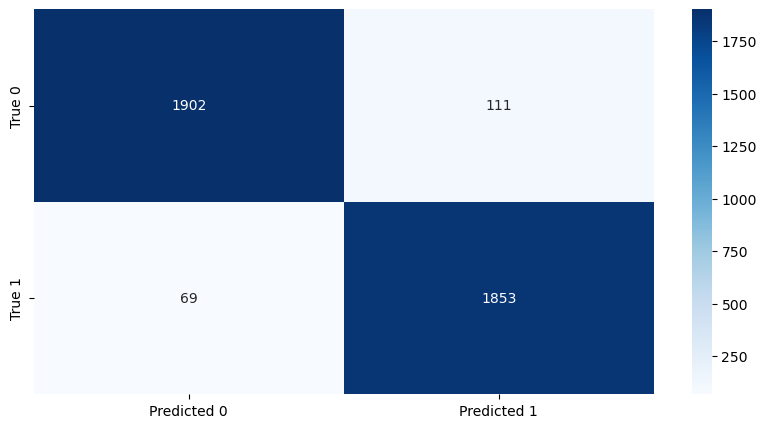

In [39]:
# Predicting our classes for our LR model as is
y_pred_LR = best_logistic_model.predict(X_test)

# Setting up our confusion matrix 
LR_confusion_matrix = confusion_matrix(y_test,y_pred_LR)

# Putting the confusion matrix in a DataFrame
LR_confusion_matrix = pd.DataFrame(data = LR_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
LR_classification_report = classification_report(y_test,y_pred_LR)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(LR_confusion_matrix)
print('\n')
print('Classification Report')
print(LR_classification_report)
print('\n') # printing a blank line

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(LR_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

In [40]:
# Identifying the top predicitng words and their coefficients to see what words predict a real or fake article
names = tfidf_final.get_feature_names_out()
coefficients = best_logistic_model.coef_[0]
df_LR = pd.DataFrame({'Coef': coefficients, 'Words': names}).sort_values(by = 'Coef',ascending = False)
df_LR.head(20)

,Coef,Words
379,16.102706,presidential
461,15.237489,spokesman
500,12.934907,told reporter
9,12.925148,adding
510,12.849043,twitter
406,11.430735,region
425,10.731640,saying
465,10.591154,statement
8,10.215959,added
352,9.849853,opposition


<Figure size 640x480 with 0 Axes>

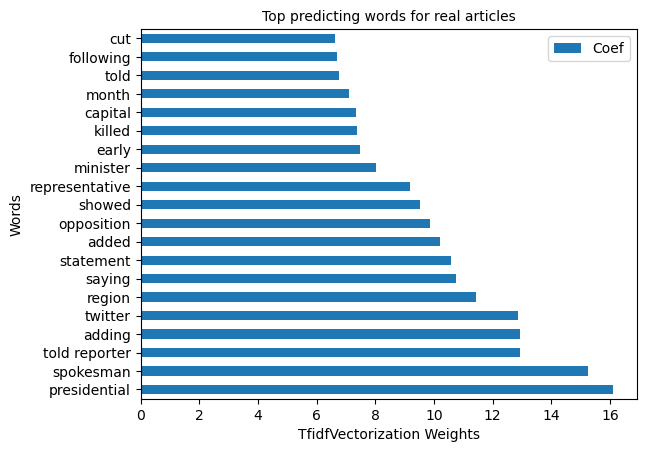

In [41]:
# Plotting the last 20 words to see what words make an article predict as true
plt.figure()
df_LR.head(20).plot.barh(x = 'Words', y = 'Coef')
plt.title('Top predicting words for real articles', fontsize = 10)
plt.xlabel('TfidfVectorization Weights')
plt.ylabel('Words')
plt.show()

# Decision Tree Classifier

In [42]:
# params_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5]
# }

In [43]:
# model = DecisionTreeClassifier(random_state=42)

In [44]:
# grid_search = GridSearchCV(estimator = model, 
#                         param_grid = params_grid, 
#                         scoring='f1',
#                         cv = 5, verbose = 1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_

In [44]:
# best_params

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}

In [45]:
%%time
## Type your code here
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=1, random_state=42)
custom_model.fit(X_train, y_train)

# Scoring the model on training data
custom_model.score(X_train, y_train)

# Scoring the model on test data
custom_model.score(X_test, y_test)

print(f'The training score using a Decision Tree Classifier is: {custom_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Decision Tree Classifier is: {custom_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Decision Tree Classifier is: 0.9747249155681447


The testing score using a Decision Tree Classifier is: 0.9039390088945363


Time taken to run the model:
CPU times: total: 7.58 s
Wall time: 9.57 s


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1783          230
True 1          148         1774


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2013
           1       0.89      0.92      0.90      1922

    accuracy                           0.90      3935
   macro avg       0.90      0.90      0.90      3935
weighted avg       0.90      0.90      0.90      3935



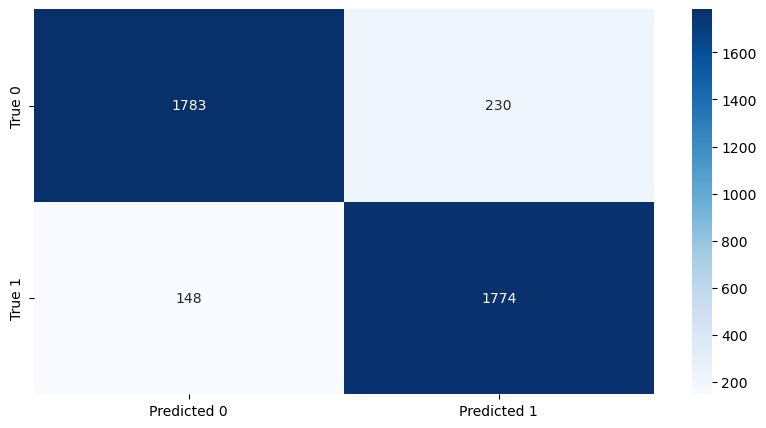

In [46]:
# Predicting our classes for our DT model as is
y_pred_DT = custom_model.predict(X_test)

# Setting up our confusion matrix 
DT_confusion_matrix = confusion_matrix(y_test,y_pred_DT)

# Putting the confusion matrix in a DataFrame
DT_confusion_matrix = pd.DataFrame(data = DT_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
DT_classification_report = classification_report(y_test,y_pred_DT)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(DT_confusion_matrix)
print('\n')
print('Classification Report')
print(DT_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(DT_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

<h2 id="evaluation">Bagging  for classification with  Scikit-learn</h2>



A Bagging classifier is an ensemble model that trains  base classifiers  on random subsets   of the original dataset  (Bootstrap Sampling by default), and then aggregate their individual predictions by voting. We import the module:



In [47]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",max_depth = 5,min_samples_leaf = 1),
                        random_state=0,n_estimators=30,bootstrap=True)
Bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=30, random_state=0)

In [48]:
# Scoring the model on training data
Bag.score(X_train, y_train)

# Scoring the model on test data
Bag.score(X_test, y_test)

print(f'The training score using a Decision Tree Classifier is: {Bag.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Decision Tree Classifier is: {Bag.score(X_test, y_test)}')

The training score using a Decision Tree Classifier is: 0.8752587427824382


The testing score using a Decision Tree Classifier is: 0.866581956797967


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1608          405
True 1          120         1802


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2013
           1       0.82      0.94      0.87      1922

    accuracy                           0.87      3935
   macro avg       0.87      0.87      0.87      3935
weighted avg       0.87      0.87      0.87      3935



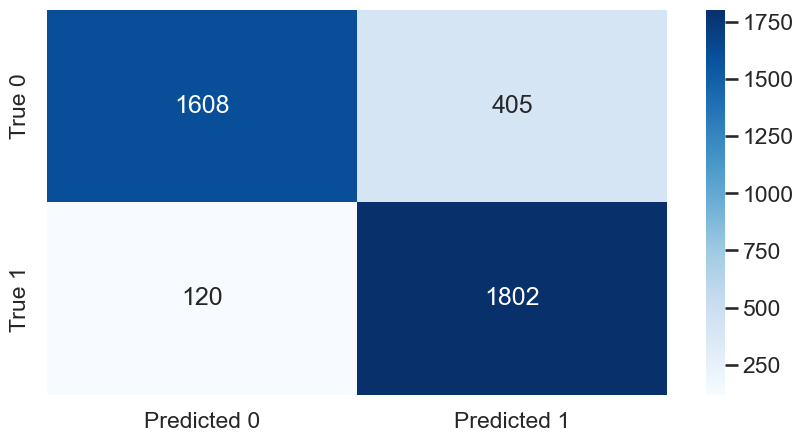

In [76]:
# Predicting our classes for our DT model as is
y_pred_BAG = Bag.predict(X_test)

# Setting up our confusion matrix 
Bag_matrix = confusion_matrix(y_test,y_pred_DT)

# Putting the confusion matrix in a DataFrame
Bag_matrix = pd.DataFrame(data = Bag_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
Bag_matrix_report = classification_report(y_test,y_pred_DT)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(Bag_matrix)
print('\n')
print('Classification Report')
print(Bag_matrix_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(Bag_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

In the context of Bagging, which is an ensemble method that combines multiple base classifiers, having high precision and low recall might indicate that the base classifiers in the ensemble are biased towards making positive predictions for certain patterns in the data, leading to a high precision but potentially missing other positive instances and thus resulting in a low recall.
- Let's Try Random Forrest.

# Random Forrest

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\rohit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.088572
20.0,0.078549
30.0,0.066456
40.0,0.058503
50.0,0.057740
100.0,0.049570
150.0,0.045648
200.0,0.045103
300.0,0.043251


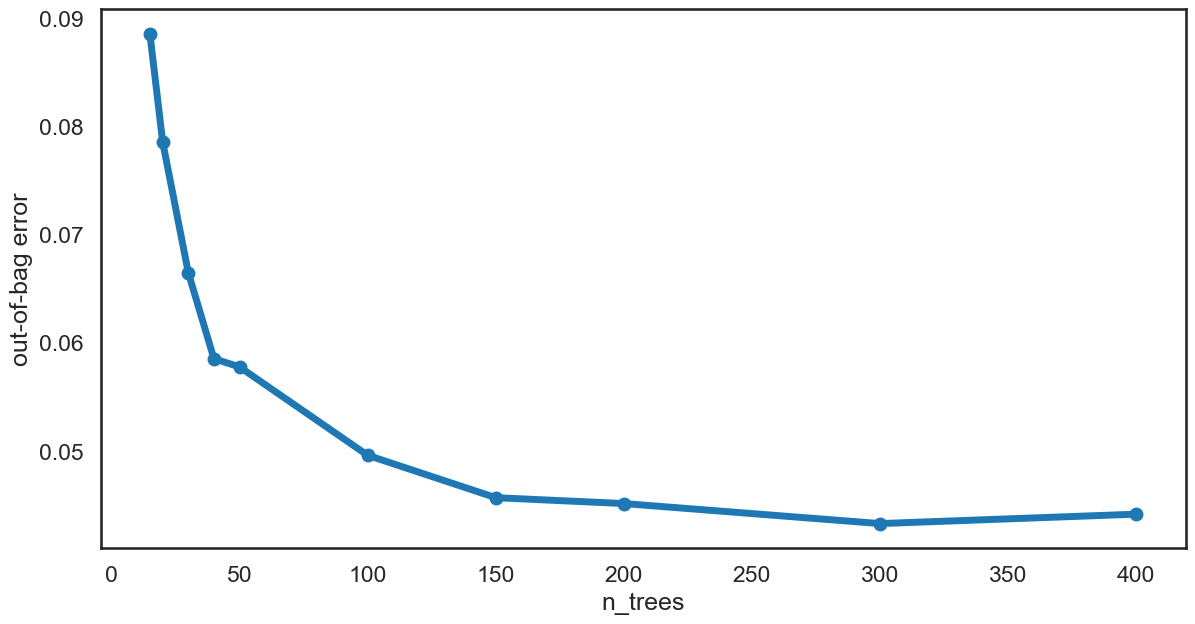

In [51]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [52]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=150)

y_pred = model.predict(X_test)

Confusion Matrix
        Predicted 0  Predicted 1
True 0         1916           97
True 1           80         1842


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2013
           1       0.95      0.96      0.95      1922

    accuracy                           0.96      3935
   macro avg       0.95      0.96      0.96      3935
weighted avg       0.96      0.96      0.96      3935



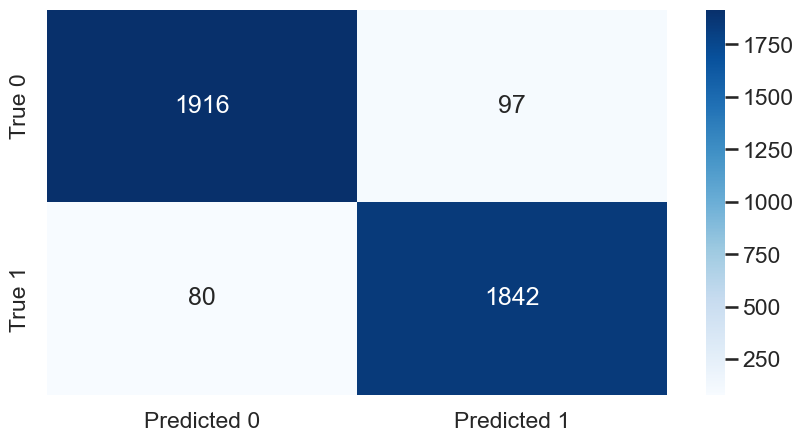

In [53]:
# Setting up our confusion matrix 
RF_matrix = confusion_matrix(y_test,y_pred)

# Putting the confusion matrix in a DataFrame
RF_matrix = pd.DataFrame(data = RF_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
RF_matrix_report = classification_report(y_test,y_pred)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(RF_matrix)
print('\n')
print('Classification Report')
print(RF_matrix_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(RF_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

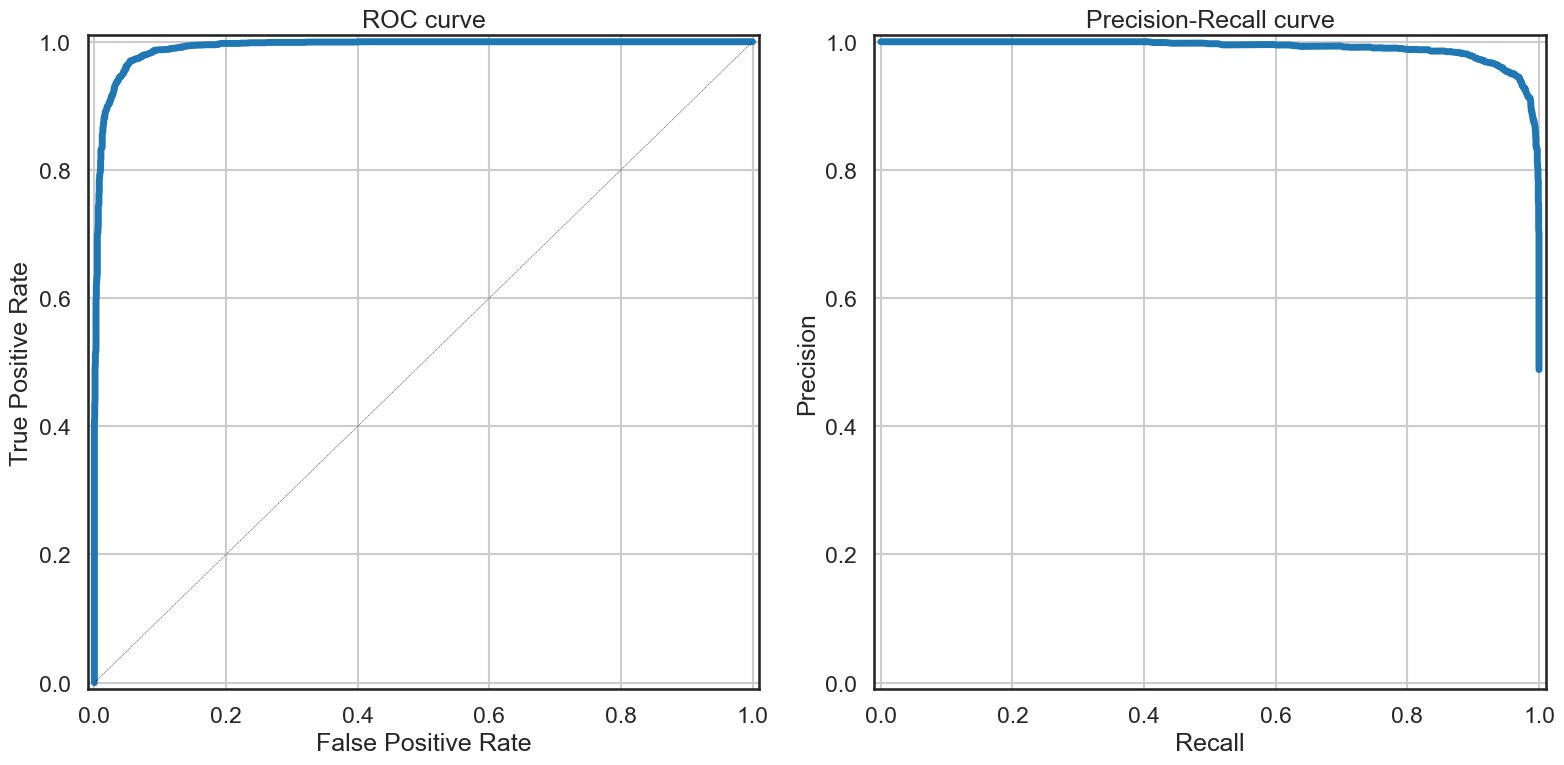

In [54]:
from sklearn.metrics import make_scorer, precision_score, recall_score, roc_curve, precision_recall_curve, auc

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

y_test = y_test.astype(int)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

# K Nearest Neighbors

This model requires us to scale the data:


In [55]:
# Applying PCA to the orignial k-dimensional data set
# Instantiating the Scaler
scaler = StandardScaler(with_mean = False)

# Fitting the Model
scaler.fit(X_train)

# Transforming the training set 
X_train_scaled = scaler.transform(X_train)

# Transforming the test set 
X_test_scaled = scaler.transform(X_test)

In [56]:
%%time
# Instantiating the K Nearest Neighbors model
KNN_model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

# Fitting the Model
KNN_model.fit(X_train_scaled, y_train)

# Scoring the model on training data
KNN_model.score(X_train_scaled, y_train)

# Scoring the model on test data
KNN_model.score(X_test_scaled, y_test)

print(f'The training score using a K Nearest Neighbors is: {KNN_model.score(X_train_scaled, y_train)}')
print('\n')
print(f'The testing score using a K Nearest Neighbors is: {KNN_model.score(X_test_scaled, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a K Nearest Neighbors is: 0.9064168210044667


The testing score using a K Nearest Neighbors is: 0.8226175349428209


Time taken to run the model:
CPU times: total: 36min 33s
Wall time: 19min 49s


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1552          461
True 1          237         1685


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2013
           1       0.79      0.88      0.83      1922

    accuracy                           0.82      3935
   macro avg       0.83      0.82      0.82      3935
weighted avg       0.83      0.82      0.82      3935





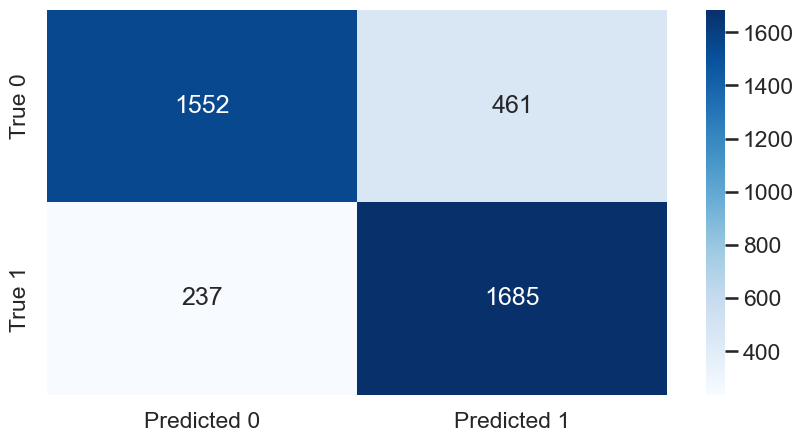

In [66]:
# Predicting our classes for our LR model as is
y_pred_KNN = KNN_model.predict(X_test_scaled)

# Setting up our confusion matrix 
KNN_confusion_matrix = confusion_matrix(y_test,y_pred_KNN)

# Putting the confusion matrix in a DataFrame
KNN_confusion_matrix = pd.DataFrame(data = KNN_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
KNN_classification_report = classification_report(y_test,y_pred_KNN)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(KNN_confusion_matrix)
print('\n')
print('Classification Report')
print(KNN_classification_report)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(KNN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()


# Neural Network

In [58]:
%%time
# Instantiating the Neural Network model
NN_model = MLPClassifier()

# Fitting the Model
NN_model.fit(X_train, y_train)

# Scoring the model on training data
NN_model.score(X_train, y_train)

# Scoring the model on test data
NN_model.score(X_test, y_test)

print(f'The training score using a Neural Network is: {NN_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Neural Network is: {NN_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Neural Network is: 1.0


The testing score using a Neural Network is: 0.9552731893265566


Time taken to run the model:
CPU times: total: 1min 23s
Wall time: 54.2 s


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1925           88
True 1           88         1834


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2013
           1       0.95      0.95      0.95      1922

    accuracy                           0.96      3935
   macro avg       0.96      0.96      0.96      3935
weighted avg       0.96      0.96      0.96      3935





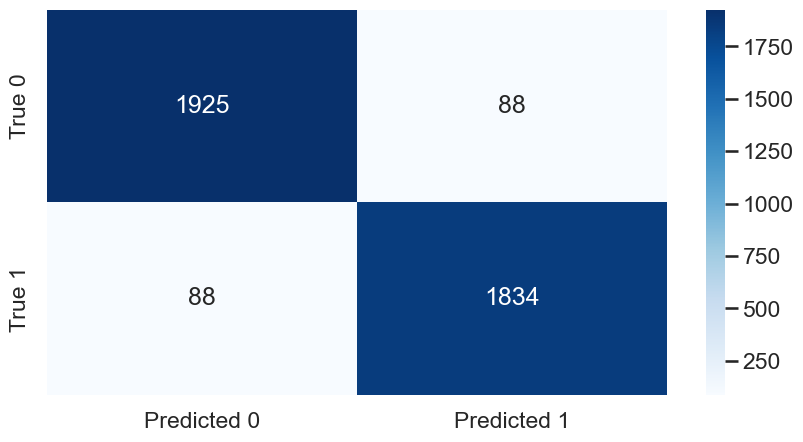

In [59]:
# Predicting our classes for our LR model as is
y_pred_NN = NN_model.predict(X_test)

# Setting up our confusion matrix 
NN_confusion_matrix = confusion_matrix(y_test,y_pred_NN)

# Putting the confusion matrix in a DataFrame
NN_confusion_matrix = pd.DataFrame(data = NN_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
NN_classification_report = classification_report(y_test,y_pred_NN)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(NN_confusion_matrix)
print('\n')
print('Classification Report')
print(NN_classification_report)
print('\n')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(NN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

# Naive Bayes Classifier

In [60]:
%%time
# Instantiating the Naive Bayes Multinomial model
NB_model = MultinomialNB()

# Fitting the Model
NB_model.fit(X_train, y_train)

# Scoring the model on training data
NB_model.score(X_train, y_train)

# Scoring the model on test data
NB_model.score(X_test, y_test)

print(f'The training score using a Naive Bayes Multinomial is: {NB_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Naive Bayes Multinomial is: {NB_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Naive Bayes Multinomial is: 0.9149144787013835


The testing score using a Naive Bayes Multinomial is: 0.9141041931385007


Time taken to run the model:
CPU times: total: 0 ns
Wall time: 40.5 ms


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1804          209
True 1          129         1793


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2013
           1       0.90      0.93      0.91      1922

    accuracy                           0.91      3935
   macro avg       0.91      0.91      0.91      3935
weighted avg       0.91      0.91      0.91      3935



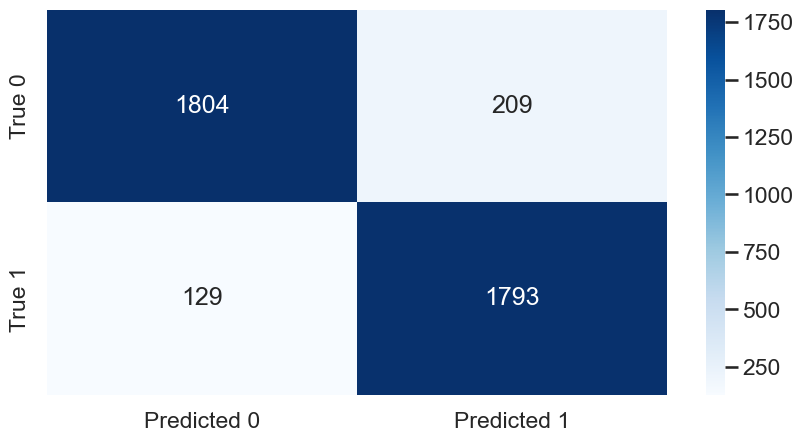

In [61]:
# Predicting our classes for our LR model as is
y_pred_NB = NB_model.predict(X_test)

# Setting up our confusion matrix 
NB_confusion_matrix = confusion_matrix(y_test,y_pred_NB)

# Putting the confusion matrix in a DataFrame
NB_confusion_matrix = pd.DataFrame(data = NB_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
NB_classification_report = classification_report(y_test,y_pred_NB)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(NB_confusion_matrix)
print('\n')
print('Classification Report')
print(NB_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(NB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()
print('\n')

# Support Vector Machines

In [67]:
%%time
# Instantiating the Naive Bayes Multinomial model
SVC_model = LinearSVC()

# Fitting the Model
SVC_model.fit(X_train, y_train)

# Scoring the model on training data
SVC_model.score(X_train, y_train)

# Scoring the model on test data
SVC_model.score(X_test, y_test)

print(f'The training score using a Support Vector Machines Classifier is: {SVC_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a Support Vector Machines Classifier is: {SVC_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a Support Vector Machines Classifier is: 0.9735265279442205


The testing score using a Support Vector Machines Classifier is: 0.9547649301143584


Time taken to run the model:
CPU times: total: 62.5 ms
Wall time: 79.5 ms


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1899          114
True 1           64         1858


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2013
           1       0.94      0.97      0.95      1922

    accuracy                           0.95      3935
   macro avg       0.95      0.96      0.95      3935
weighted avg       0.96      0.95      0.95      3935



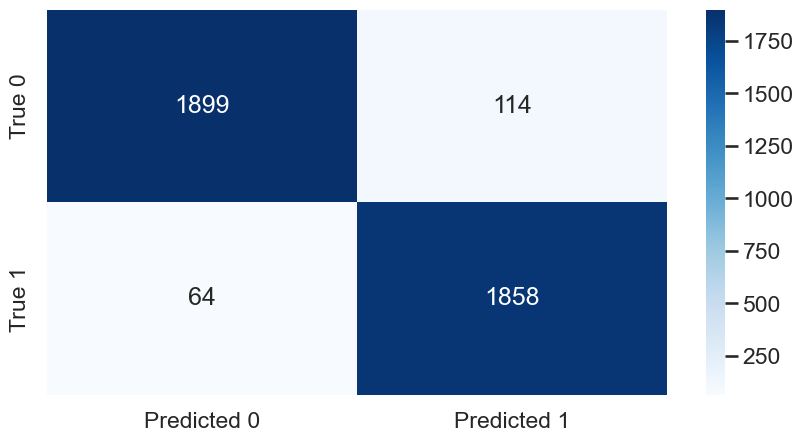

In [68]:
# Predicting our classes for our LR model as is
y_pred_SVC = SVC_model.predict(X_test)

# Setting up our confusion matrix 
SVC_confusion_matrix = confusion_matrix(y_test,y_pred_SVC)

# Putting the confusion matrix in a DataFrame
SVC_confusion_matrix = pd.DataFrame(data = SVC_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
SVC_classification_report = classification_report(y_test,y_pred_SVC)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(SVC_confusion_matrix)
print('\n')
print('Classification Report')
print(SVC_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(SVC_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

# AdaBoost Classifier

In [69]:
%%time
# Instantiating the AdaBoostClassifier Multinomial model
ADB_model = AdaBoostClassifier()

# Fitting the Model
ADB_model.fit(X_train, y_train)

# Scoring the model on training data
ADB_model.score(X_train, y_train)

# Scoring the model on test data
ADB_model.score(X_test, y_test)

print(f'The training score using a AdaBoost Classifier is: {ADB_model.score(X_train, y_train)}')
print('\n')
print(f'The testing score using a AdaBoost Classifier is: {ADB_model.score(X_test, y_test)}')
print('\n')
print('Time taken to run the model:')

The training score using a AdaBoost Classifier is: 0.9487961651596034


The testing score using a AdaBoost Classifier is: 0.9379923761118171


Time taken to run the model:
CPU times: total: 7.14 s
Wall time: 11.3 s


Confusion Matrix
        Predicted 0  Predicted 1
True 0         1855          158
True 1           86         1836


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2013
           1       0.92      0.96      0.94      1922

    accuracy                           0.94      3935
   macro avg       0.94      0.94      0.94      3935
weighted avg       0.94      0.94      0.94      3935



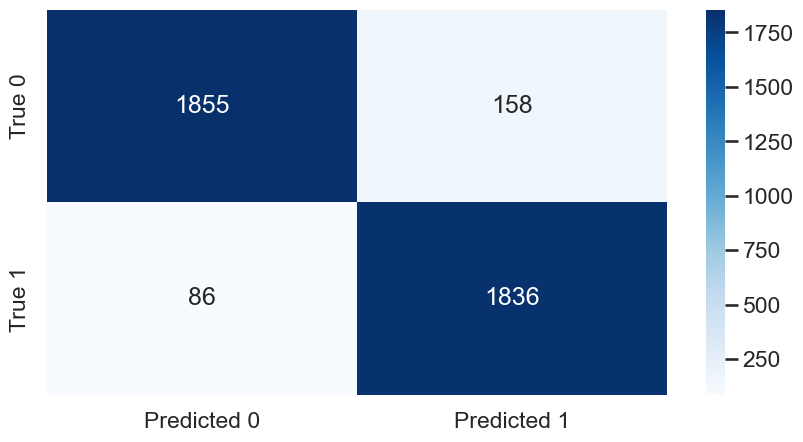

In [70]:
# Predicting our classes for our LR model as is
y_pred_ADB = ADB_model.predict(X_test)

# Setting up our confusion matrix 
ADB_confusion_matrix = confusion_matrix(y_test,y_pred_ADB)

# Putting the confusion matrix in a DataFrame
ADB_confusion_matrix = pd.DataFrame(data = ADB_confusion_matrix,\
                                   columns = ['Predicted 0', 'Predicted 1'],\
                                  index = ['True 0','True 1'])

# Setting up our classification_report
ADB_classification_report = classification_report(y_test,y_pred_ADB)

# Printing confusion matrix in DataFrame
print('Confusion Matrix')
print(ADB_confusion_matrix)
print('\n')
print('Classification Report')
print(ADB_classification_report)

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(ADB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.show()

**Confusion Matrix Subplots for all Models**

Text(0.5, 1.0, 'Support Vector Classifier  - Confusion Matrix')

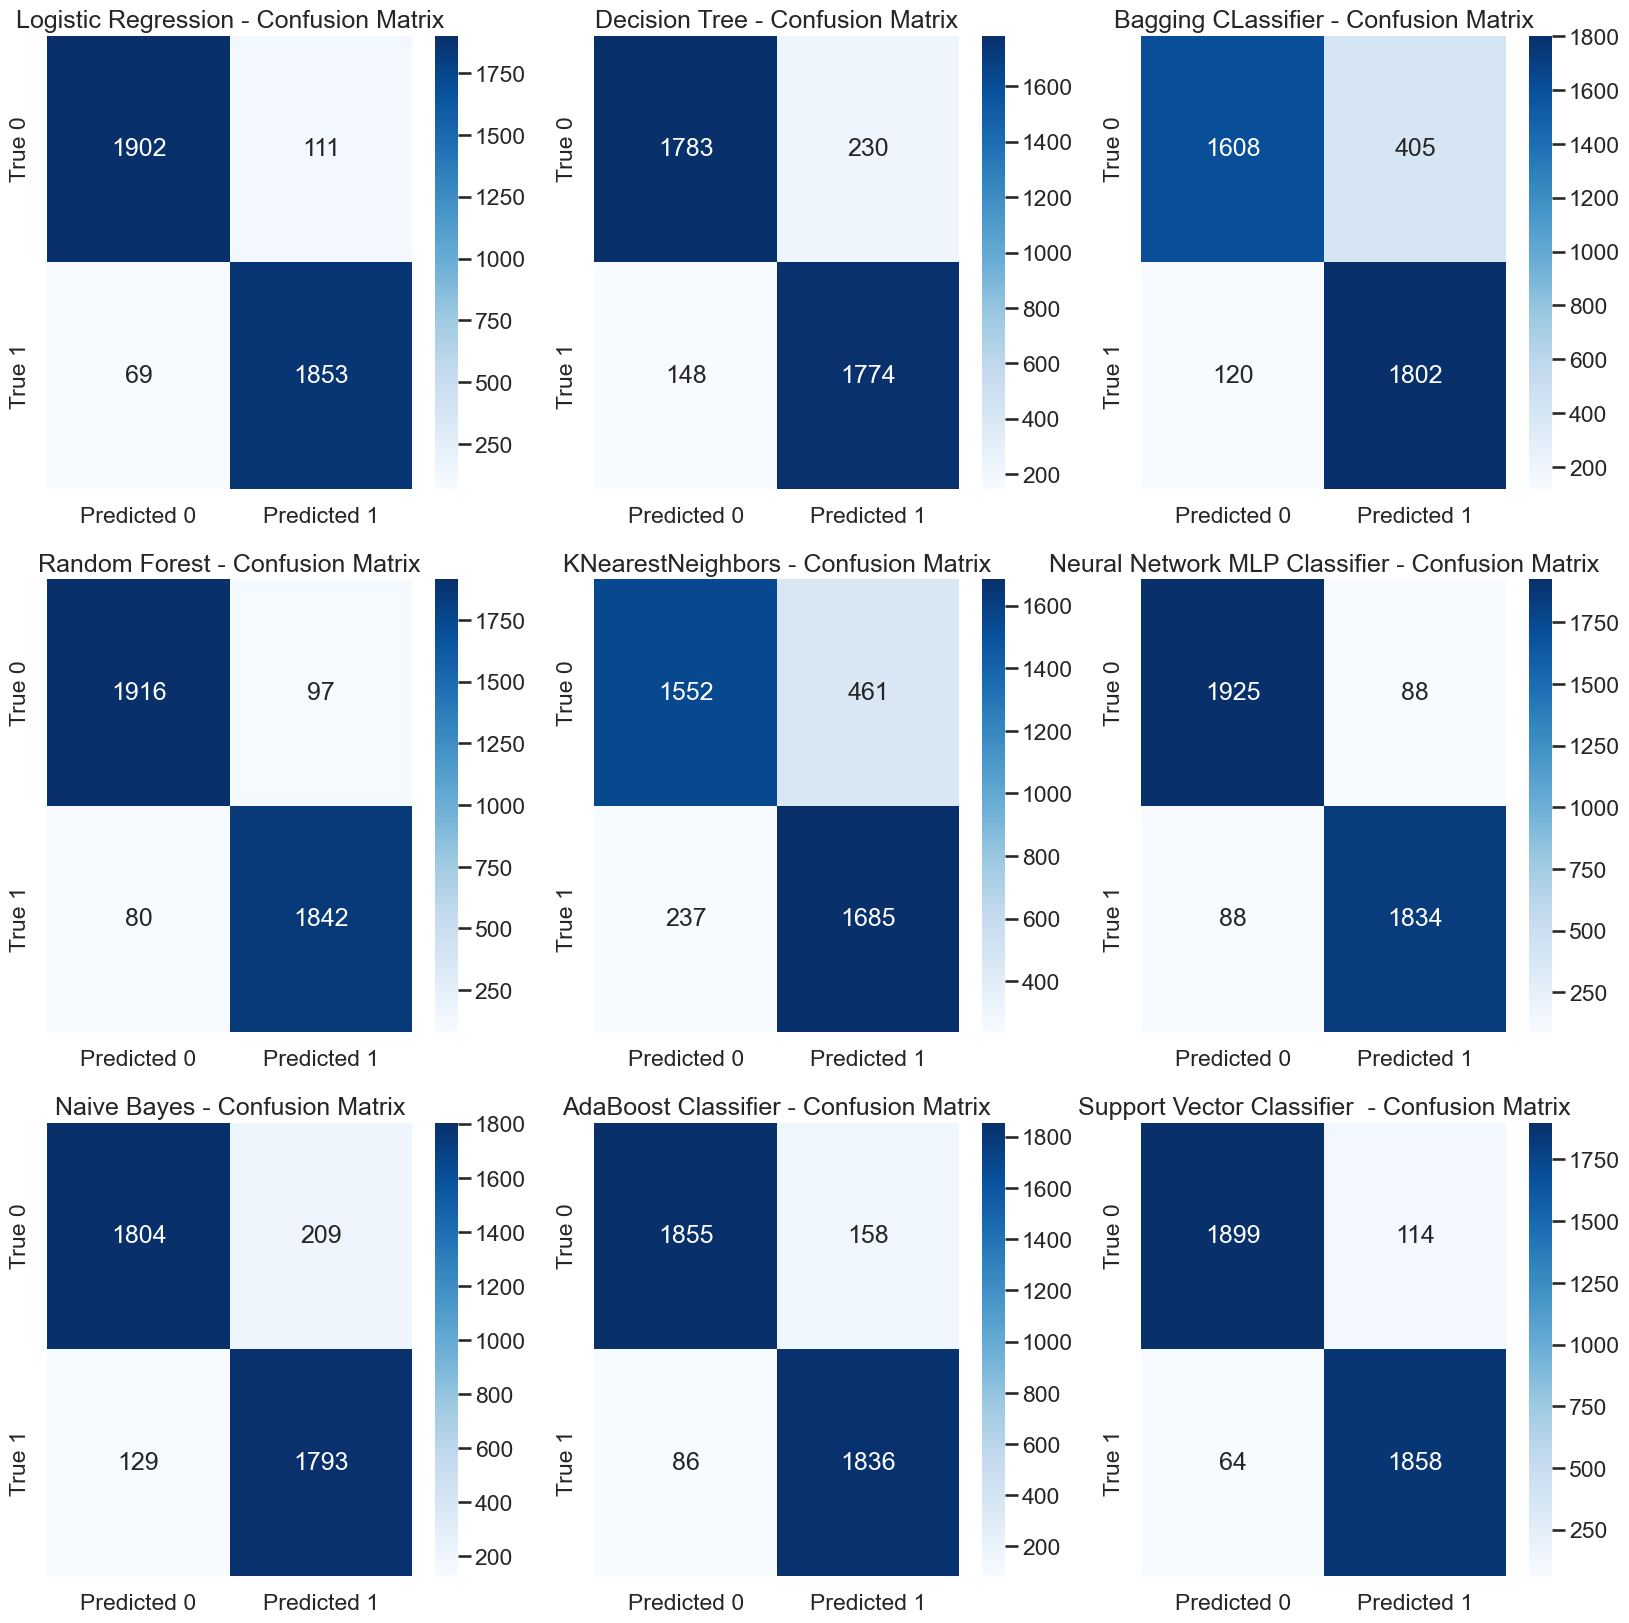

In [71]:
# Subplot 1 - Plotting confusion matrix heatmap subplot for Logistic Regresion
plt.subplots(3,3,figsize = (20,20))
plt.subplot(3,3,1) 
sns.heatmap(LR_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.title('Logistic Regression - Confusion Matrix')

# Subplot 2 - Plotting confusion matrix heatmap subplot for Decision Trees
plt.subplot(3,3,2) 
sns.heatmap(DT_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Decision Tree - Confusion Matrix') 

# Subplot 3 - Plotting confusion matrix heatmap subplot for Bagging Classifier
plt.subplot(3,3,3) 
sns.heatmap(Bag_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Bagging CLassifier - Confusion Matrix') 


# Subplot 4 - Plotting confusion matrix heatmap subplot for Random Forest
plt.subplot(3,3,4) 
sns.heatmap(RF_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Random Forest - Confusion Matrix')

# Subplot 5 - Plotting confusion matrix heatmap subplot for K Nearest Neighbors
plt.subplot(3,3,5) 
sns.heatmap(KNN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('KNearestNeighbors - Confusion Matrix')

# Subplot 6 - Plotting confusion matrix heatmap subplot for Neural Network
plt.subplot(3,3,6) 
sns.heatmap(NN_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Neural Network MLP Classifier - Confusion Matrix')

# Subplot 7 - Plotting confusion matrix heatmap subplot for Naive Bayes
plt.subplot(3,3,7) 
sns.heatmap(NB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Naive Bayes - Confusion Matrix')


# Subplot 8 - Plotting confusion matrix heatmap subplot for Ada Boost
plt.subplot(3,3,8)
sns.heatmap(ADB_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('AdaBoost Classifier - Confusion Matrix')


# Subplot 9 - Plotting confusion matrix heatmap subplot for Support Vector Machines 
plt.subplot(3,3,9)
sns.heatmap(SVC_confusion_matrix, annot = True, cmap='Blues', fmt = 'g') 
plt.title('Support Vector Classifier  - Confusion Matrix')


In terms of looking at the confusion matrices above, we must keep in mind that true articles are denoted by **1** while fake articles are denoted by **0**. We can see from the above that the best model regardless of accuracy is the **Logistic Regression** which has the highest number of true positives and true negatives while only having to wrongly classify articles less than 0.02% of the time. 

One of the observation we made is that K Nearest Neighbors Classifier tends to do the worse out of all baseline models when looking at the confusion matrix even though it has an accuracy of slightly over 80. But when making the decision, it seems to not really identify the true negatives correctly but rather many false negatives which is equivalent to just tossing a coin and making the decision.

Below, we're going to save all these models that we instantiated so that we can give the user an option to choose from the models.

In [73]:
# Saving all the different models created
#Saving Logistic Regression models
joblib.dump(best_logistic_model, 'LR_model.pkl')
joblib.dump(best_logistic_model, 'LR_model.h5')

#Saving Decision Tree model
joblib.dump(custom_model, 'DT_model.pkl')
joblib.dump(custom_model, 'DT_model.h5')

#Saving Decision Tree model
joblib.dump(Bag, 'Bag_model.pkl')
joblib.dump(Bag, 'Bag_model.h5')

#Saving Random Forest model
joblib.dump(model, 'RF_model.pkl')
joblib.dump(model, 'RF_model.h5')

#Saving the K Nearest Neighbors model even though the performance wasn't so great
joblib.dump(KNN_model, 'KNN_model.pkl')
joblib.dump(KNN_model, 'KNN_model.h5')

#Saving Neural Network model
joblib.dump(NN_model, 'NN_model.pkl')
joblib.dump(NN_model, 'NN_model.h5')

#Saving Naive Bayes model
joblib.dump(NB_model, 'NB_model.pkl')
joblib.dump(NB_model, 'NB_model.h5')

#SAving AdaBoost model
joblib.dump(ADB_model, 'ADB_model.pkl')
joblib.dump(ADB_model, 'ADB_model.h5')

# Saving Support Vector Machines models
joblib.dump(SVC_model, 'SVC_model.pkl')
joblib.dump(SVC_model, 'SVC_model.h5')


['SVC_model.h5']

**Let's now take a look at all the training and testing scores for the models we ran above:**

In [80]:
# Adding Accuracy scores
accuracy_scores = [accuracy_score(y_test,y_pred_LR),accuracy_score(y_test,y_pred_BAG), accuracy_score(y_test,y_pred_DT) ,accuracy_score(y_test,y_pred),\
                   accuracy_score(y_test,y_pred_KNN),accuracy_score(y_test,y_pred_NN), accuracy_score(y_test,y_pred_NB), accuracy_score(y_test,y_pred_ADB), accuracy_score(y_test, y_pred_SVC)]

# Adding precision scores to list
precision_scores_0 = [precision_score(y_test,y_pred_LR, pos_label = 0), precision_score(y_test,y_pred_BAG, pos_label = 0),\
                      precision_score(y_test,y_pred_DT, pos_label = 0), precision_score(y_test,y_pred, pos_label = 0),\
                      precision_score(y_test,y_pred_KNN, pos_label = 0), precision_score(y_test,y_pred_NN, pos_label = 0),\
                      precision_score(y_test,y_pred_NB, pos_label = 0), precision_score(y_test,y_pred_ADB, pos_label = 0), precision_score(y_test,y_pred_SVC, pos_label = 0)]

precision_scores_1 = [precision_score(y_test,y_pred_LR, pos_label = 1), precision_score(y_test,y_pred_BAG, pos_label = 1),\
                      precision_score(y_test,y_pred_DT, pos_label = 1),precision_score(y_test,y_pred, pos_label = 1),\
                      precision_score(y_test,y_pred_KNN, pos_label = 1), precision_score(y_test,y_pred_NN, pos_label = 1),\
                      precision_score(y_test,y_pred_NB, pos_label = 1), precision_score(y_test,y_pred_ADB, pos_label = 1), precision_score(y_test,y_pred_SVC, pos_label = 1)]

# Adding recall scores to list
recall_scores_0 = [recall_score(y_test,y_pred_LR, pos_label = 0), recall_score(y_test,y_pred_BAG, pos_label = 0),\
                   recall_score(y_test,y_pred_DT, pos_label = 0), recall_score(y_test,y_pred, pos_label = 0),\
                   recall_score(y_test,y_pred_KNN, pos_label = 0), recall_score(y_test,y_pred_NN, pos_label = 0),\
                   recall_score(y_test,y_pred_NB, pos_label = 0), recall_score(y_test,y_pred_ADB, pos_label = 0), recall_score(y_test,y_pred_SVC, pos_label = 0)]

recall_scores_1 = [recall_score(y_test,y_pred_LR, pos_label = 1), recall_score(y_test,y_pred_BAG, pos_label = 1),\
                   recall_score(y_test,y_pred_DT, pos_label = 1), recall_score(y_test,y_pred, pos_label = 1),\
                   recall_score(y_test,y_pred_KNN, pos_label = 1),recall_score(y_test,y_pred_NN, pos_label = 1),\
                   recall_score(y_test,y_pred_NB, pos_label = 1), recall_score(y_test,y_pred_ADB, pos_label = 1), recall_score(y_test,y_pred_SVC, pos_label = 1)]

f1_scores_0 = [f1_score(y_test,y_pred_LR, pos_label = 0), f1_score(y_test,y_pred_BAG, pos_label = 0),\
                   f1_score(y_test,y_pred_DT, pos_label = 0), f1_score(y_test,y_pred, pos_label = 0),\
                   f1_score(y_test,y_pred_KNN, pos_label = 0), f1_score(y_test,y_pred_NN, pos_label = 0),\
                   f1_score(y_test,y_pred_NB, pos_label = 0), f1_score(y_test,y_pred_ADB, pos_label = 0), f1_score(y_test,y_pred_SVC, pos_label = 0)]

f1_scores_1 = [recall_score(y_test,y_pred_LR, pos_label = 1), f1_score(y_test,y_pred_BAG, pos_label = 1),\
                   f1_score(y_test,y_pred_DT, pos_label = 1), f1_score(y_test,y_pred, pos_label = 1),\
                   f1_score(y_test,y_pred_KNN, pos_label = 1),f1_score(y_test,y_pred_NN, pos_label = 1),\
                   f1_score(y_test,y_pred_NB, pos_label = 1), f1_score(y_test,y_pred_ADB, pos_label = 1), f1_score(y_test,y_pred_SVC, pos_label = 1)]

In [81]:
scoring = pd.DataFrame([accuracy_scores,
                  precision_scores_0,
                  recall_scores_0,
                  precision_scores_1,
                  recall_scores_1,
                  f1_scores_0,
                  f1_scores_1],\
             columns = ['Logistic Regression',\
                        'Bagging Classifier',\
                        'Decision Tree Classifier',\
                        'Random Forest Classifier',\
                        'K Nearest Neighbors',\
                        'Neural Network',\
                        'Naive Bayes',\
                        'AdaBoost Classifier',\
                       'Support Vector Machines'], index = ['Accuracy',
                                                            'Precision - Fake',
                                                            'Recall - Fake',
                                                            'Precision - True',
                                                            'Recall - True',
                                                            'F1 Score - Fake',
                                                            'F1 Score - True']).T
scoring

,Accuracy,Precision - Fake,Recall - Fake,Precision - True,Recall - True,F1 Score - Fake,F1 Score - True
Logistic Regression,0.954257,0.964992,0.944858,0.943483,0.964100,0.954819,0.964100
Bagging Classifier,0.866582,0.930556,0.798808,0.816493,0.937565,0.859663,0.872851
Decision Tree Classifier,0.866582,0.930556,0.798808,0.816493,0.937565,0.859663,0.872851
Random Forest Classifier,0.955019,0.959920,0.951813,0.949974,0.958377,0.955849,0.954157
K Nearest Neighbors,0.822618,0.867524,0.770989,0.785182,0.876691,0.816412,0.828417
Neural Network,0.955273,0.956284,0.956284,0.954214,0.954214,0.956284,0.954214
Naive Bayes,0.914104,0.933264,0.896175,0.895604,0.932882,0.914344,0.913863
AdaBoost Classifier,0.937992,0.955693,0.921510,0.920762,0.955255,0.938290,0.937692
Support Vector Machines,0.954765,0.967397,0.943368,0.942191,0.966701,0.955231,0.954289


**Interpretation of the scores:**

Right of the bat, we can see that some of our models perform very well and are able to classify real and fake articles to an accuracy of up to 98%. However, accuracy alone should not be considered the best metric alone. Below, we'll take a look at the accuracy, precision, recall and f1-scores to really identify which model performs better but prior to that, let's state some observations noted from the scores above:

- Logistic Regression, Naive Bayes, Neural Networks MLP Classifier, Ada Boost and SVMs are close to perfect.
- Unsurprisingly, Random Forest Classifier gave us a lower score compared to the Decision Tree Classifier.
- K Neighbors Classifier does an average job in terms of the accuracy, scoring much lesser than every other model.  

# Conclusion

To wrap up, we ran over 9 different models in order to identify the way how articles are written. We ran the following models:

- Logistic Regression
- Bagging CLassifier
- Decision Tree Classifier
- Random Forest Classifier
- K Nearest Neighbors Classifier
- Naive Bayes Multinomial Classifier
- Neural Network MLP Classifier
- Ada Boost Classifier
- Support Vector Machines Classifier

we can see that Logistic Regression performed very well with an accuracy of almost 90% without any hyperparameter optimization. 

A note to be made here is that applying dimensionality reduction and scaling our data was not necessary as we're only dealing with one specific column here which is `text` from both dataframes in a combined dataframe altogether. Hence, it does not make sense to reduce the dimensionality and scale our data. 
